In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import ensemble


In [2]:
a = pd.read_csv('USDCAD_Candlestick_1_M_BID_27.12.2020-28.12.2020.csv')


In [3]:
df = pd.DataFrame(a)
display(df.head())
display(df.tail())

,Gmt time,Open,High,Low,Close,Volume
0,28.12.2020 00:00:00.000,1.28401,1.28401,1.28360,1.28360,140.26
1,28.12.2020 00:01:00.000,1.28362,1.28370,1.28345,1.28364,112.50
2,28.12.2020 00:02:00.000,1.28363,1.28390,1.28363,1.28389,87.50
3,28.12.2020 00:03:00.000,1.28389,1.28429,1.28388,1.28412,155.75
4,28.12.2020 00:04:00.000,1.28413,1.28429,1.28396,1.28425,141.00


,Gmt time,Open,High,Low,Close,Volume
2875,29.12.2020 23:55:00.000,1.28199,1.28218,1.28199,1.28218,20.45
2876,29.12.2020 23:56:00.000,1.28215,1.28223,1.28215,1.28218,12.22
2877,29.12.2020 23:57:00.000,1.28217,1.28218,1.28217,1.28217,195.94
2878,29.12.2020 23:58:00.000,1.28217,1.28218,1.28217,1.28218,16.50
2879,29.12.2020 23:59:00.000,1.28219,1.28224,1.28218,1.28220,19.56


In [4]:
# Set the date as datetime
df['datetime'] = pd.to_datetime(df['Gmt time'])
df = df.set_index(df['datetime'])
df.index.names = [None]

<AxesSubplot:>

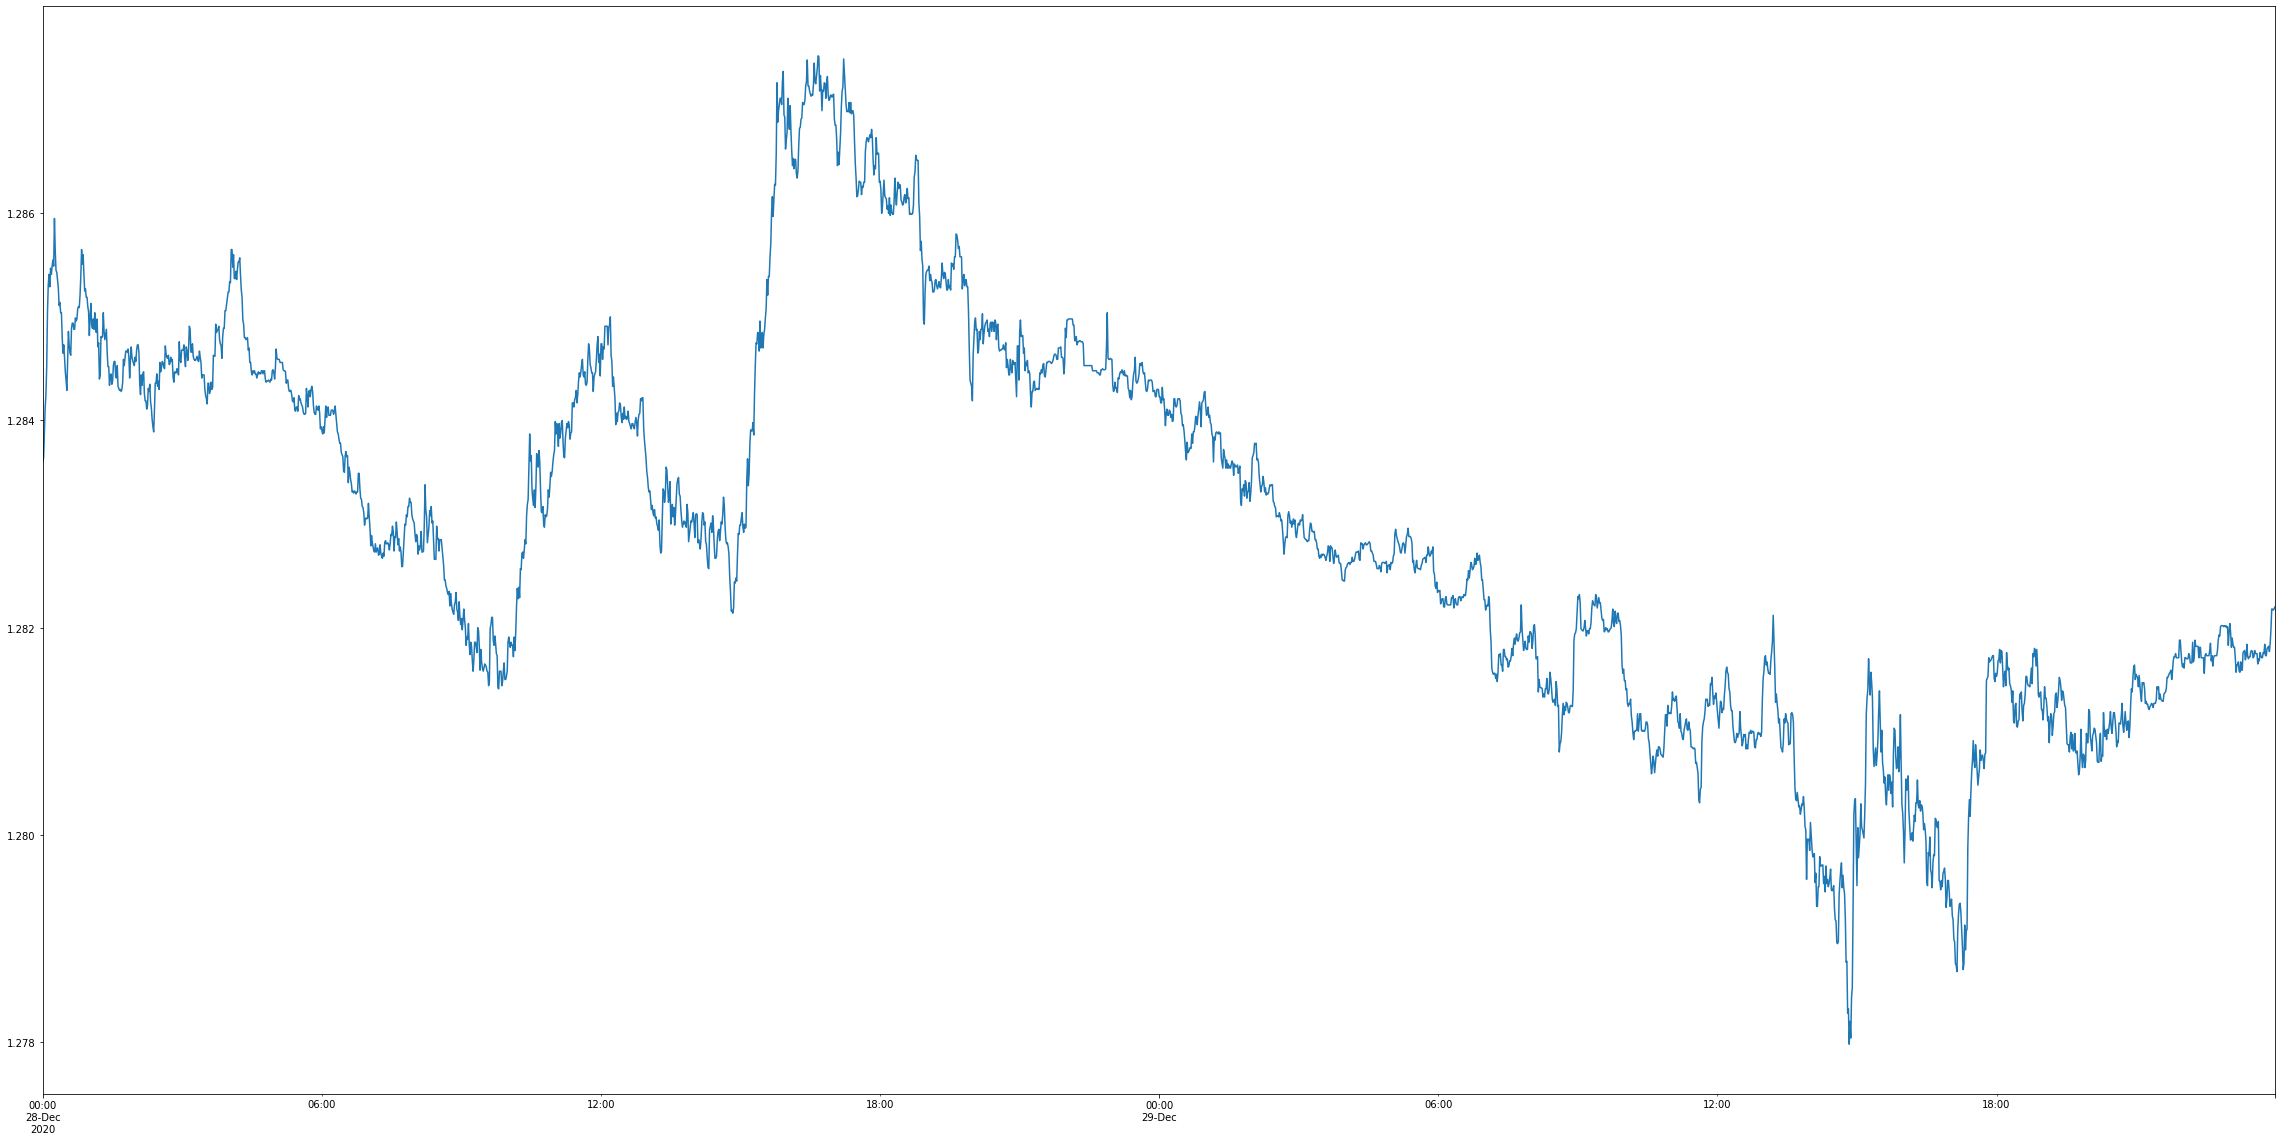

In [5]:
df['Close'].plot(figsize=(40,20))


<AxesSubplot:>

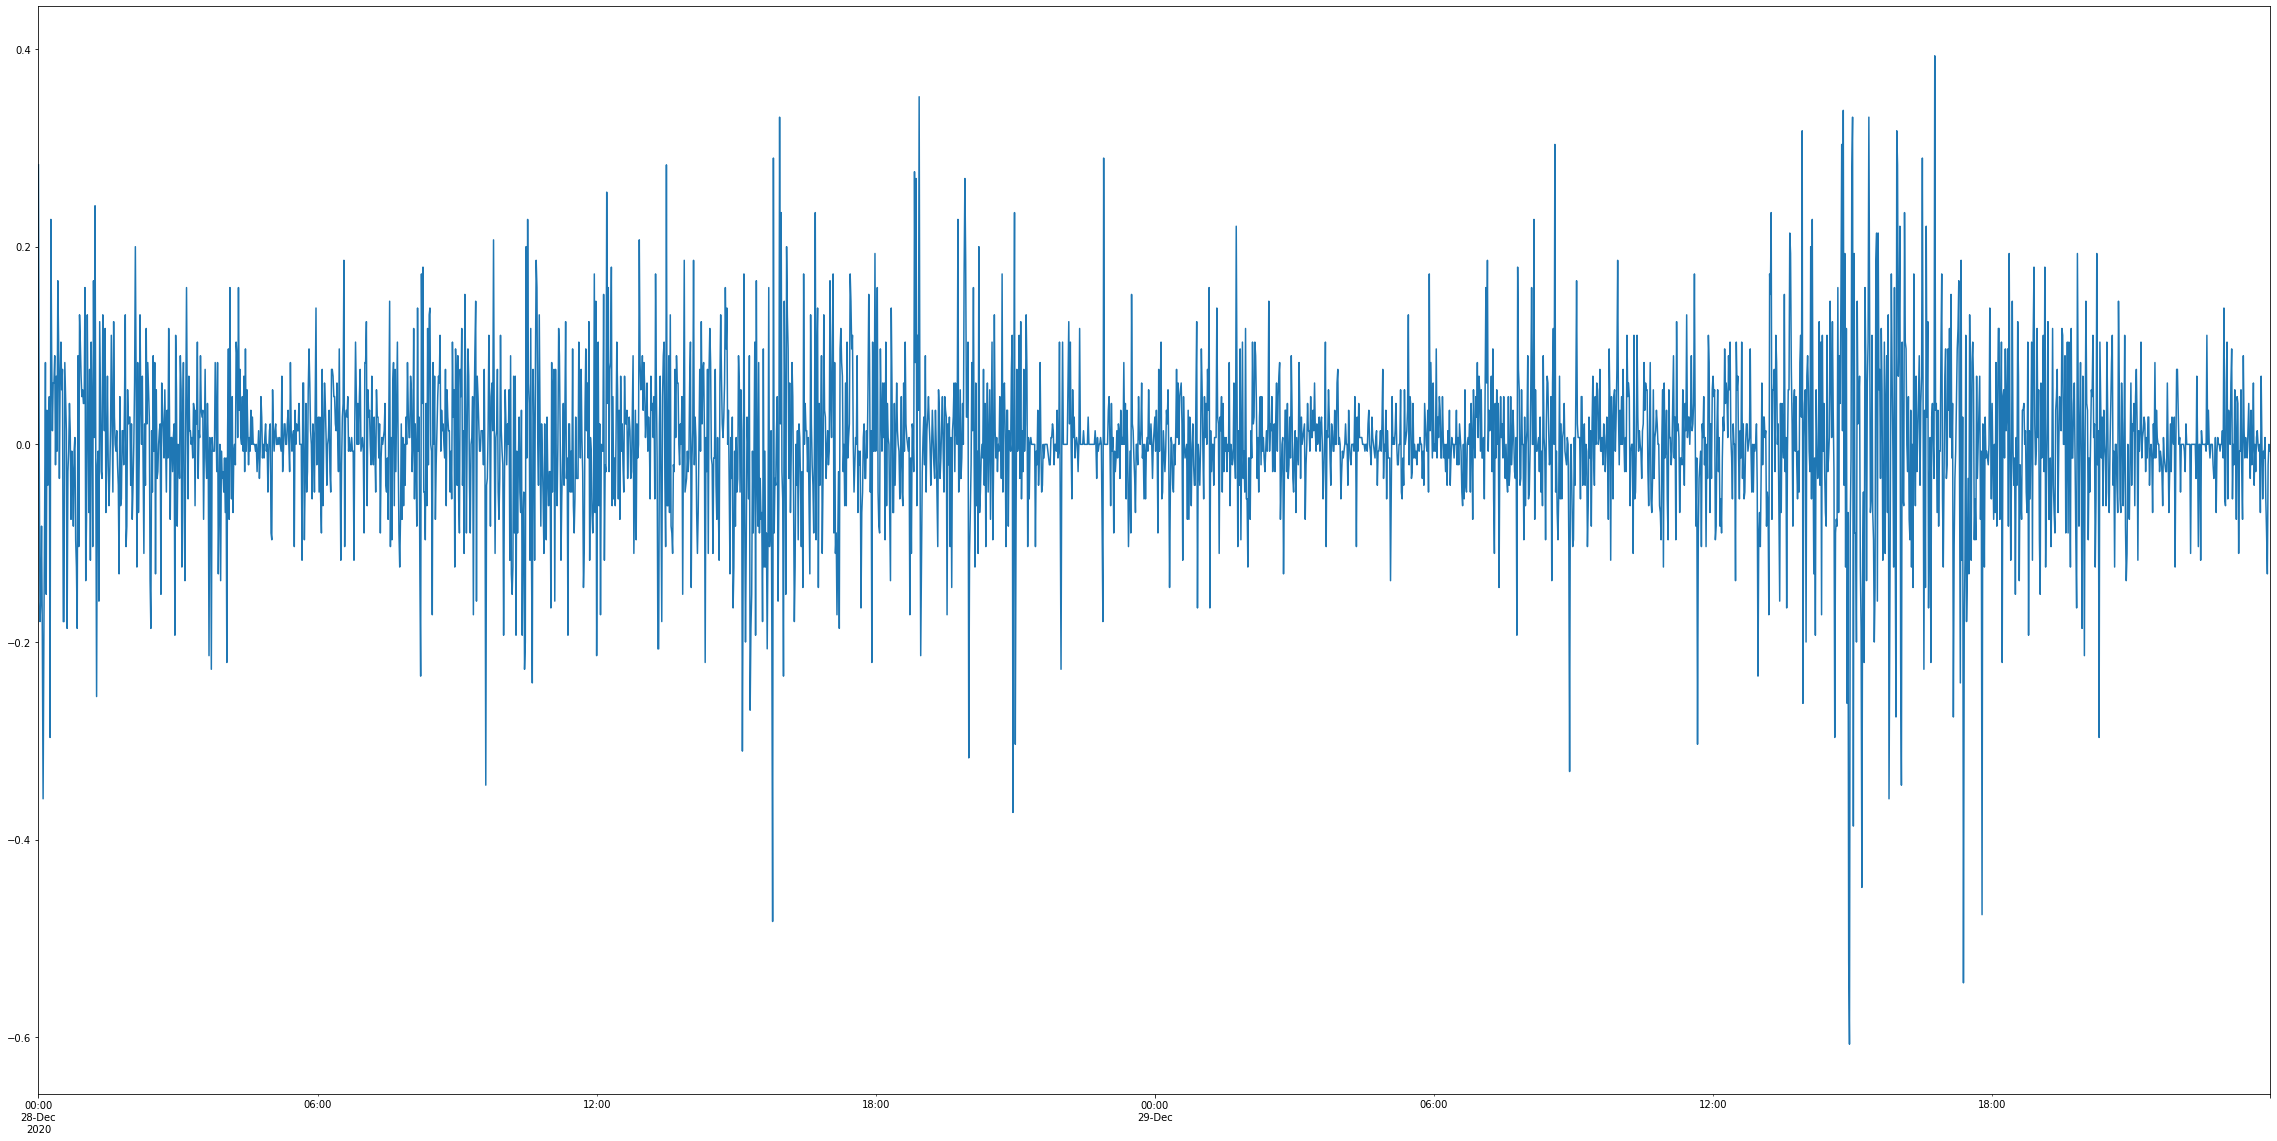

In [6]:
# Create return (open-close) normalized
# We use this value to train mode

df['return_next'] = df['Open'].shift(-1) - df['Close'].shift(-1)
return_range = df['return_next'].max() - df['return_next'].min()
df['return_next'] = df['return_next'] / return_range

df['return'] = df['Open'] - df['Close']
return_range = df['return'].max() - df['return'].min()
df['return'] = df['return'] / return_range

# If return > 0, green; otherwise, red

df['return'].plot(figsize=(40,20))

In [7]:
# Make label, 1 as rising price, 0 as falling price - prediction for the following timestamp

df['label'] = df['return_next'].apply(lambda x: 1 if x>0.0 else 0)

#drop columns that show NAN
df.dropna(inplace=True)

df.head(10)


,Gmt time,Open,High,Low,Close,Volume,datetime,return_next,return,label
2020-12-28 00:00:00,28.12.2020 00:00:00.000,1.28401,1.28401,1.28360,1.28360,140.26,2020-12-28 00:00:00,-0.013793,0.282759,0
2020-12-28 00:01:00,28.12.2020 00:01:00.000,1.28362,1.28370,1.28345,1.28364,112.50,2020-12-28 00:01:00,-0.179310,-0.013793,0
2020-12-28 00:02:00,28.12.2020 00:02:00.000,1.28363,1.28390,1.28363,1.28389,87.50,2020-12-28 00:02:00,-0.158621,-0.179310,0
2020-12-28 00:03:00,28.12.2020 00:03:00.000,1.28389,1.28429,1.28388,1.28412,155.75,2020-12-28 00:03:00,-0.082759,-0.158621,0
2020-12-28 00:04:00,28.12.2020 00:04:00.000,1.28413,1.28429,1.28396,1.28425,141.00,2020-12-28 00:04:00,-0.193103,-0.082759,0
2020-12-28 00:05:00,28.12.2020 00:05:00.000,1.28424,1.28454,1.28424,1.28452,96.10,2020-12-28 00:05:00,-0.358621,-0.193103,0
2020-12-28 00:06:00,28.12.2020 00:06:00.000,1.28452,1.28517,1.28452,1.28504,169.91,2020-12-28 00:06:00,-0.193103,-0.358621,0
2020-12-28 00:07:00,28.12.2020 00:07:00.000,1.28503,1.28533,1.28493,1.28531,129.62,2020-12-28 00:07:00,-0.068966,-0.193103,0
2020-12-28 00:08:00,28.12.2020 00:08:00.000,1.28531,1.28543,1.28522,1.28541,85.84,2020-12-28 00:08:00,0.082759,-0.068966,1
2020-12-28 00:09:00,28.12.2020 00:09:00.000,1.28541,1.28541,1.28518,1.28529,59.18,2020-12-28 00:09:00,-0.151724,0.082759,0


In [8]:
df.dtypes

Gmt time               object
Open                  float64
High                  float64
Low                   float64
Close                 float64
Volume                float64
datetime       datetime64[ns]
return_next           float64
return                float64
label                   int64
dtype: object

In [9]:
# Make training dataset

n_features = 60 # number of features

train_x = np.array([]).reshape([-1,n_features])
train_y = np.array([]).reshape([-1,1])
for index, row in df.iterrows():
    i = df.index.get_loc(index)
    if i<n_features:
        continue
    
    _x = np.array(df[i-n_features+1:i+1]['return']).T.reshape([1, -1])
    _y = df.iloc[i]['label']
    train_x = np.vstack((train_x, _x))
    train_y = np.vstack((train_y, _y))
train_y = train_y.reshape([-1])
print(train_x.shape)
print(train_y.shape)
print('%% of Class0 : %f' % (np.count_nonzero(train_y == 0)/float(len(train_y))))
print('%% of Class1 : %f' % (np.count_nonzero(train_y == 1)/float(len(train_y))))

(2819, 60)
(2819,)
% of Class0 : 0.531039
% of Class1 : 0.468961


In [10]:
# Define Model and fit
# Here we use 95% of data for training, and last 5% for testing

##clf = GradientBoostingClassifier(random_state=0, learning_rate=0.01, n_estimators=10000)
clf = ensemble.GradientBoostingClassifier(verbose=3)

train_len = int(len(train_x)*0.95)
x_train = train_x[:train_len]
y_train = train_y[:train_len]

clf.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3802            4.64s
         2           1.3756            3.67s
         3           1.3719            3.16s
         4           1.3691            2.90s
         5           1.3660            2.71s
         6           1.3623            2.59s
         7           1.3596            2.58s
         8           1.3565            2.58s
         9           1.3527            2.59s
        10           1.3500            2.50s
        11           1.3459            2.43s
        12           1.3437            2.35s
        13           1.3413            2.28s
        14           1.3394            2.22s
        15           1.3376            2.16s
        16           1.3350            2.14s
        17           1.3334            2.11s
        18           1.3313            2.08s
        19           1.3290            2.07s
        20           1.3247            2.05s
        21           1.3233            2.03s
        2

GradientBoostingClassifier(verbose=3)

In [11]:
accuracy = clf.score(x_train, y_train)
print('Testing Accuracy: %f' % accuracy)

Testing Accuracy: 0.811426


,return,label,pred,won,profit,equity
135,-0.00013,0.0,0.0,True,1.3,4.2
136,-0.00019,0.0,0.0,True,1.9,6.1
137,-0.00003,0.0,0.0,True,0.3,6.4
138,0.00000,0.0,0.0,True,0.0,6.4
139,-0.00001,0.0,0.0,True,0.1,6.5


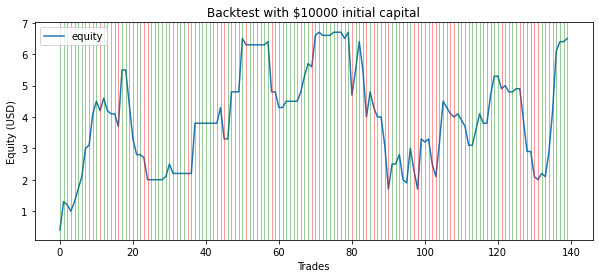

In [12]:
# Predict test data

pred = clf.predict(train_x[train_len:])


# Calculate equity..

contracts  = 10000.0
commission = 0.0


df_trade = pd.DataFrame(train_x[train_len:,-1], columns=['return'])
df_trade['label']  = train_y[train_len:]
df_trade['pred']   = pred
df_trade['won']    = df_trade['label'] == df_trade['pred']
df_trade['return'] = df_trade['return'].shift(-1) * return_range
df_trade.drop(df_trade.index[len(df_trade)-1], inplace=True)

def calc_profit(row):
    if row['won']:
        return abs(row['return'])*contracts - commission
    else:
        return -abs(row['return'])*contracts - commission

df_trade['profit'] = df_trade.apply(lambda row: calc_profit(row), axis=1)
df_trade['equity'] = df_trade['profit'].cumsum()

display(df_trade.tail())
df_trade.plot(y='equity', figsize=(10,4), title='Backtest with $10000 initial capital')
plt.xlabel('Trades')
plt.ylabel('Equity (USD)')
for r in df_trade.iterrows():
    if r[1]['won']:
        plt.axvline(x=r[0], linewidth=0.5, alpha=0.8, color='g')
    else:
        plt.axvline(x=r[0], linewidth=0.5, alpha=0.8, color='r')

Net Profit            : $6.50
Number Winning Trades : 49
Number Losing Trades  : 47
Percent Profitable    : 51.04%
Avg Win Trade         : $0.651
Avg Los Trade         : $-0.540
Largest Win Trade     : $1.900
Largest Los Trade     : $-2.000
Profit Factor         : 1.26


<AxesSubplot:>

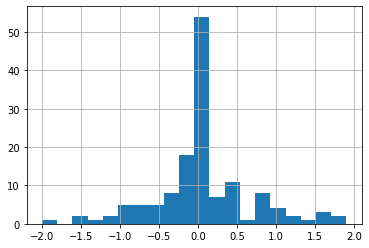

In [13]:
# Calculate summary of trades

n_win_trades = float(df_trade[df_trade['profit']>0.0]['profit'].count())
n_los_trades = float(df_trade[df_trade['profit']<0.0]['profit'].count())
print("Net Profit            : $%.2f" % df_trade.tail(1)['equity'])
print("Number Winning Trades : %d" % n_win_trades)
print("Number Losing Trades  : %d" % n_los_trades)
print("Percent Profitable    : %.2f%%" % (100*n_win_trades/(n_win_trades + n_los_trades)))
print("Avg Win Trade         : $%.3f" % df_trade[df_trade['profit']>0.0]['profit'].mean())
print("Avg Los Trade         : $%.3f" % df_trade[df_trade['profit']<0.0]['profit'].mean())
print("Largest Win Trade     : $%.3f" % df_trade[df_trade['profit']>0.0]['profit'].max())
print("Largest Los Trade     : $%.3f" % df_trade[df_trade['profit']<0.0]['profit'].min())
print("Profit Factor         : %.2f" % abs(df_trade[df_trade['profit']>0.0]['profit'].sum()/df_trade[df_trade['profit']<0.0]['profit'].sum()))

df_trade['profit'].hist(bins=20)